In [2]:
import pandas as pd 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

import matplotlib.pyplot as plt

import scikitplot as skplt

In [3]:
df= pd.read_csv('./data/consensus_dataset_corrected.csv')
df

,ads,consensus
0,see how you are paying for lea marquez peterso...,1
1,it is a dnc rule that a presidential candidate...,1
2,giant sharks whales and turtles oh my this no...,0
3,people with uc often worry about when their ne...,0
4,let us call this what it is republicans in con...,1
...,...,...
9913,we shall overcome from the album mourning in a...,1
9914,last day to make a yearend contribution to the...,1
9915,bts ci mco gpme sam training center in grenoble,0
9916,the face of the revolution in louisiana law in...,0


In [4]:
X_train, X_test, y_train, y_test= train_test_split( df['ads'], df['consensus'], test_size =0.2, random_state= 42)

In [5]:
# Use term frequency to represent documents
tf_vectorizer = CountVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [6]:
# create and train the multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tf,y_train)

MultinomialNB()

accuracy:   0.796
              precision    recall  f1-score   support

no consensus       0.98      0.60      0.75       989
   consensus       0.71      0.99      0.83       995

    accuracy                           0.80      1984
   macro avg       0.85      0.80      0.79      1984
weighted avg       0.85      0.80      0.79      1984

confusion matrix:
[[594 395]
 [ 10 985]]



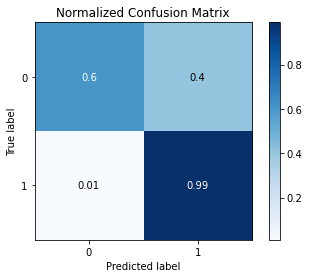

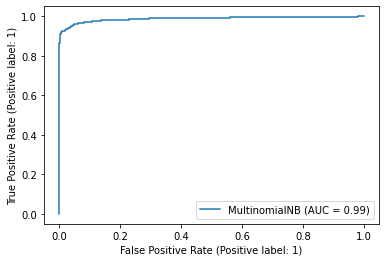

In [7]:
# make predictions
y_pred = clf.predict(X_test_tf)

# model performance
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, y_pred, target_names=['no consensus', 'consensus']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_test_tf, y_test)

In [8]:
df_val = pd.read_csv('./data/sample_consensus.csv').drop('Unnamed: 0', axis=1)
df_val

,ad,consensus
0,virtually everyone knows america has a big ill...,1
1,everyone knows smoking causes cancer but did y...,1
2,virtually everyone knows america has a big ill...,1
3,everyone knows michigan auto insurance is the ...,1
4,canadians from every region have shared with m...,1
5,voters want free and fair elections when im go...,1
6,massive crowds last evening for the meeting on...,1
7,several questions have come my way since the a...,0
8,brad recently stopped by to talk to henry hint...,0
9,british chickens are typically fed on soya fro...,0


In [15]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['consensus']

y_pred = clf.predict(X_val)
df_val['predictions'] = y_pred

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=[ 'no consensus', 'consensus'], zero_division= 0))


accuracy:   0.643
              precision    recall  f1-score   support

no consensus       0.00      0.00      0.00         5
   consensus       0.64      1.00      0.78         9

    accuracy                           0.64        14
   macro avg       0.32      0.50      0.39        14
weighted avg       0.41      0.64      0.50        14

